In [114]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


import os
import sys
import requests

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.linalg import toeplitz
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [115]:
# load the data and replace the '..' with nan
econ_df = pd.read_excel('Regression_1.xlsx')
econ_df = econ_df.replace('..','nan')
# set the index to the year column
econ_df = econ_df.set_index('index')


# check for nulls
display('-'*100)
display(econ_df.isnull().any())

# display the first five rows
display('-'*100)
display(econ_df.head())

'----------------------------------------------------------------------------------------------------'

Experience      False
Transfer        False
History         False
Price           False
Score           False
Involvement     False
dtype: bool

'----------------------------------------------------------------------------------------------------'

,Experience,Transfer,History,Price,Score,Involvement
index,,,,,,
1,0,6,4,1,5,3
2,0,3,5,3,8,1
3,15,1,8,2,6,1
4,5,1,2,0,10,3
5,5,3,5,1,7,1


,Experience,Transfer,History,Price,Score,Involvement
Experience,1.000000,0.007873,0.130427,0.046812,0.050390,0.108441
Transfer,0.007873,1.000000,-0.052013,0.047972,0.142417,0.050810
History,0.130427,-0.052013,1.000000,0.246381,0.037460,0.141575
Price,0.046812,0.047972,0.246381,1.000000,0.088841,0.117117
Score,0.050390,0.142417,0.037460,0.088841,1.000000,0.192744
Involvement,0.108441,0.050810,0.141575,0.117117,0.192744,1.000000


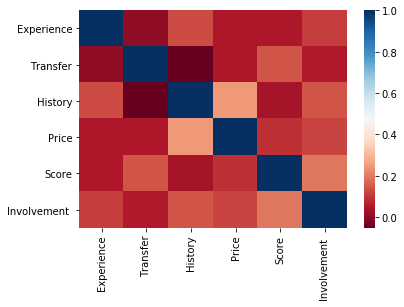

In [116]:
#print out the correlation frame

# calculate the correlation matrix
corr = econ_df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [117]:
# get the summary
desc_df = econ_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Experience,Transfer,History,Price,Score,Involvement
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,7.934426,3.770492,4.180328,1.540984,6.786885,1.901639
std,6.374085,2.019847,1.979126,0.958710,2.550260,1.075561
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000,1.000000,6.000000,1.000000
50%,5.000000,3.000000,4.000000,1.000000,7.000000,1.000000
75%,15.000000,6.000000,5.000000,2.000000,9.000000,3.000000
max,15.000000,6.000000,9.000000,5.000000,10.000000,3.000000
+3_std,27.056682,9.830032,10.117706,4.417115,14.437665,5.128321
-3_std,-11.187829,-2.289049,-1.757050,-1.335148,-0.863894,-1.325042


In [124]:

# define our input variable (X) & output variable

X = econ_df.drop('Price', axis = 1)
Y = econ_df[['Price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


# Create a Random Forest Classifier
rand_frst_Reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fit the data to the model
rand_frst_Reg.fit(X_train, y_train.values.ravel()) #.values will give the values in an array. (shape: (n,1)#.ravel will convert that array shape to (n, )

# Make predictions
y_pred = rand_frst_Reg.predict(X_test)

In [119]:

# Print the Accuracy of our Model.
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

Correct Prediction (%):  53.84615384615385


In [120]:
# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp


Score           0.289085
History         0.267787
Experience      0.191114
Transfer        0.155192
Involvement     0.096823
dtype: float64

In [121]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.615
MAE 0.66
RMSE 0.784


In [122]:
model_r2 = r2_score(y_test, y_predict)
print(model_r2)

-0.10617481159388942


In [135]:
print(X)
print(Y)

       Experience  Transfer  History  Score  Involvement 
index                                                    
1               0         6        4      5             3
2               0         3        5      8             1
3              15         1        8      6             1
4               5         1        2     10             3
5               5         3        5      7             1
...           ...       ...      ...    ...           ...
57             15         6        5     10             3
58              5         6        4      8             3
59             15         3        5      9             3
60              5         3        5      7             1
61             15         6        7      9             3

[61 rows x 5 columns]
       Price
index       
1          1
2          3
3          2
4          0
5          1
...      ...
57         2
58         3
59         2
60         2
61         2

[61 rows x 1 columns]


In [143]:
import plotly.express as px

fig2=px.scatter(X_test, regressor.predict(X_test))
fig2.show()
